#                                     LIFE EXPECTANCY DATA ANALYSIS PROJECT

###                                                Prepared By : Pulkit Mehrotra

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy.stats import ttest_ind
import math

from scipy.stats import pearsonr , spearmanr
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler ,MinMaxScaler , LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Regression Models
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.width', 500)

In [135]:
from scipy.stats.mstats import winsorize

In [137]:
df = pd.read_excel(r"C:\Users\User\Downloads\Life Expectancy Data.xlsx")

# Exploratory Data Analysis (EDA)

In [139]:
df.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.000,263.000,62,0.010,71.280,65.000,1154,19.100,83,6.000,8.160,65.000,0.100,584.259,33736494.000,17.200,17.300,0.479,10.100
1,Afghanistan,2014,Developing,59.900,271.000,64,0.010,73.524,62.000,492,18.600,86,58.000,8.180,62.000,0.100,612.697,327582.000,17.500,17.500,0.476,10.000
2,Afghanistan,2013,Developing,59.900,268.000,66,0.010,73.219,64.000,430,18.100,89,62.000,8.130,64.000,0.100,631.745,31731688.000,17.700,17.700,0.470,9.900
3,Afghanistan,2012,Developing,59.500,272.000,69,0.010,78.184,67.000,2787,17.600,93,67.000,8.520,67.000,0.100,669.959,3696958.000,17.900,18.000,0.463,9.800
4,Afghanistan,2011,Developing,59.200,275.000,71,0.010,7.097,68.000,3013,17.200,97,68.000,7.870,68.000,0.100,63.537,2978599.000,18.200,18.200,0.454,9.500


In [141]:
df.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality', 'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population', ' thinness  1-19 years', ' thinness 5-9 years', 'Income composition of resources', 'Schooling'], dtype='object')

In [143]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [145]:
print(df.isnull().sum())

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64


## Visually Checking for Missing Values

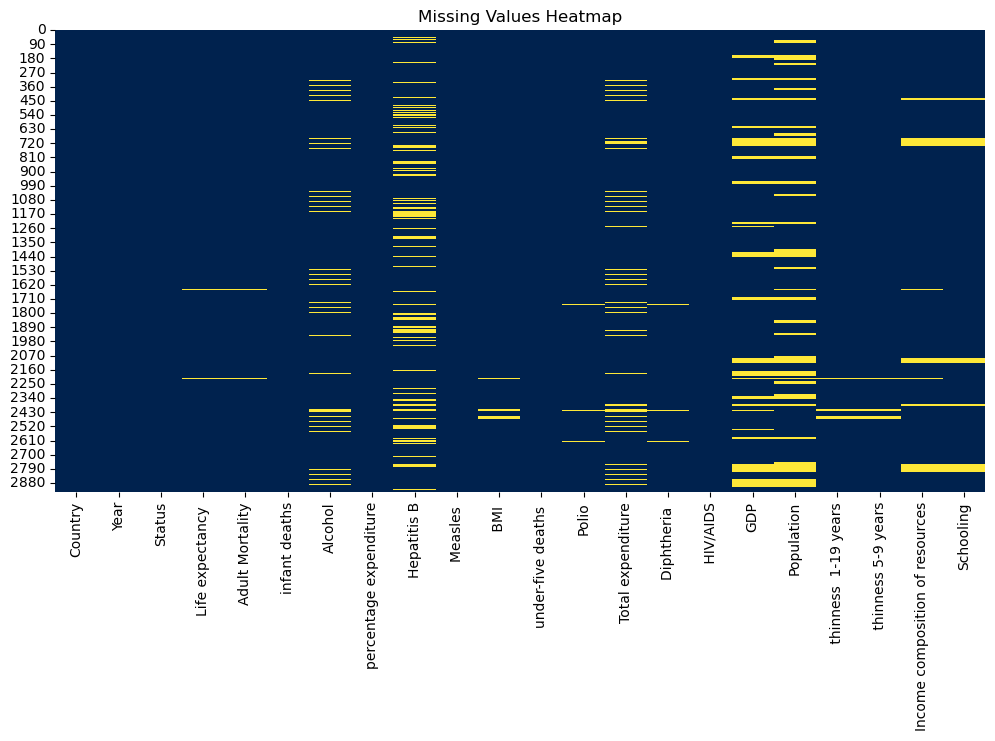

In [147]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.show()

## Filling Missing Values

In [149]:
# For numeric columns
for col in df.select_dtypes(include=np.number).columns:
    df[col] = df[col].fillna(df[col].median())

In [151]:
# for categorical columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

## Visually RE-Checking for Missing Values

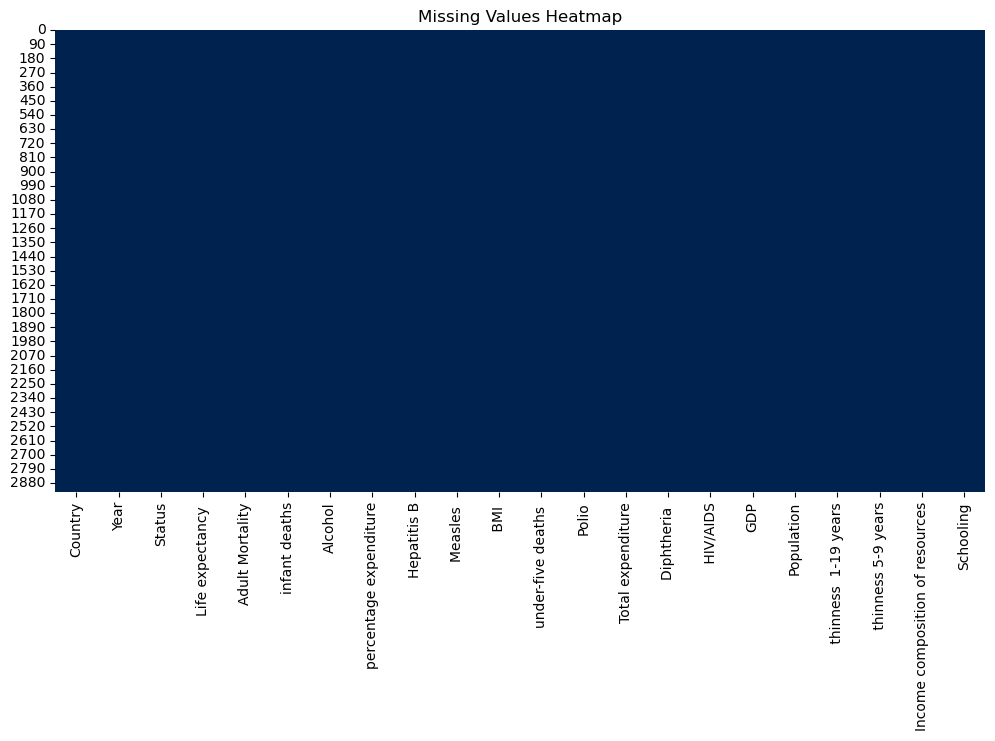

In [153]:
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='cividis')
plt.title("Missing Values Heatmap")
plt.show()

### From the above visual heatmap, It's now confirmed that there are no missing values in our data.

### > Target variable in our Dataset : Life Expectancy
### > Features/Factors in our Dataset :
###   (ii) Economic factors (GDP, Income)
###   (iii) Social factors (Education, Population)

# Outliers

Similar to missing values, there are a few things that need done in order to deal with outliers:
1. Detect the outliers
    - Boxplots/histograms
    - Tukey's Method
2. Deal with outliers
    - Drop outliers?
    - Limit/Winsorize outliers?
    - Transform the data using log/inverse/square root/etc?

## Outliers Detection

First a boxplot and histogram will be created for each continuous variable in order to visually see if outliers exist.

ValueError: num must be an integer with 1 <= num <= 36, not 37

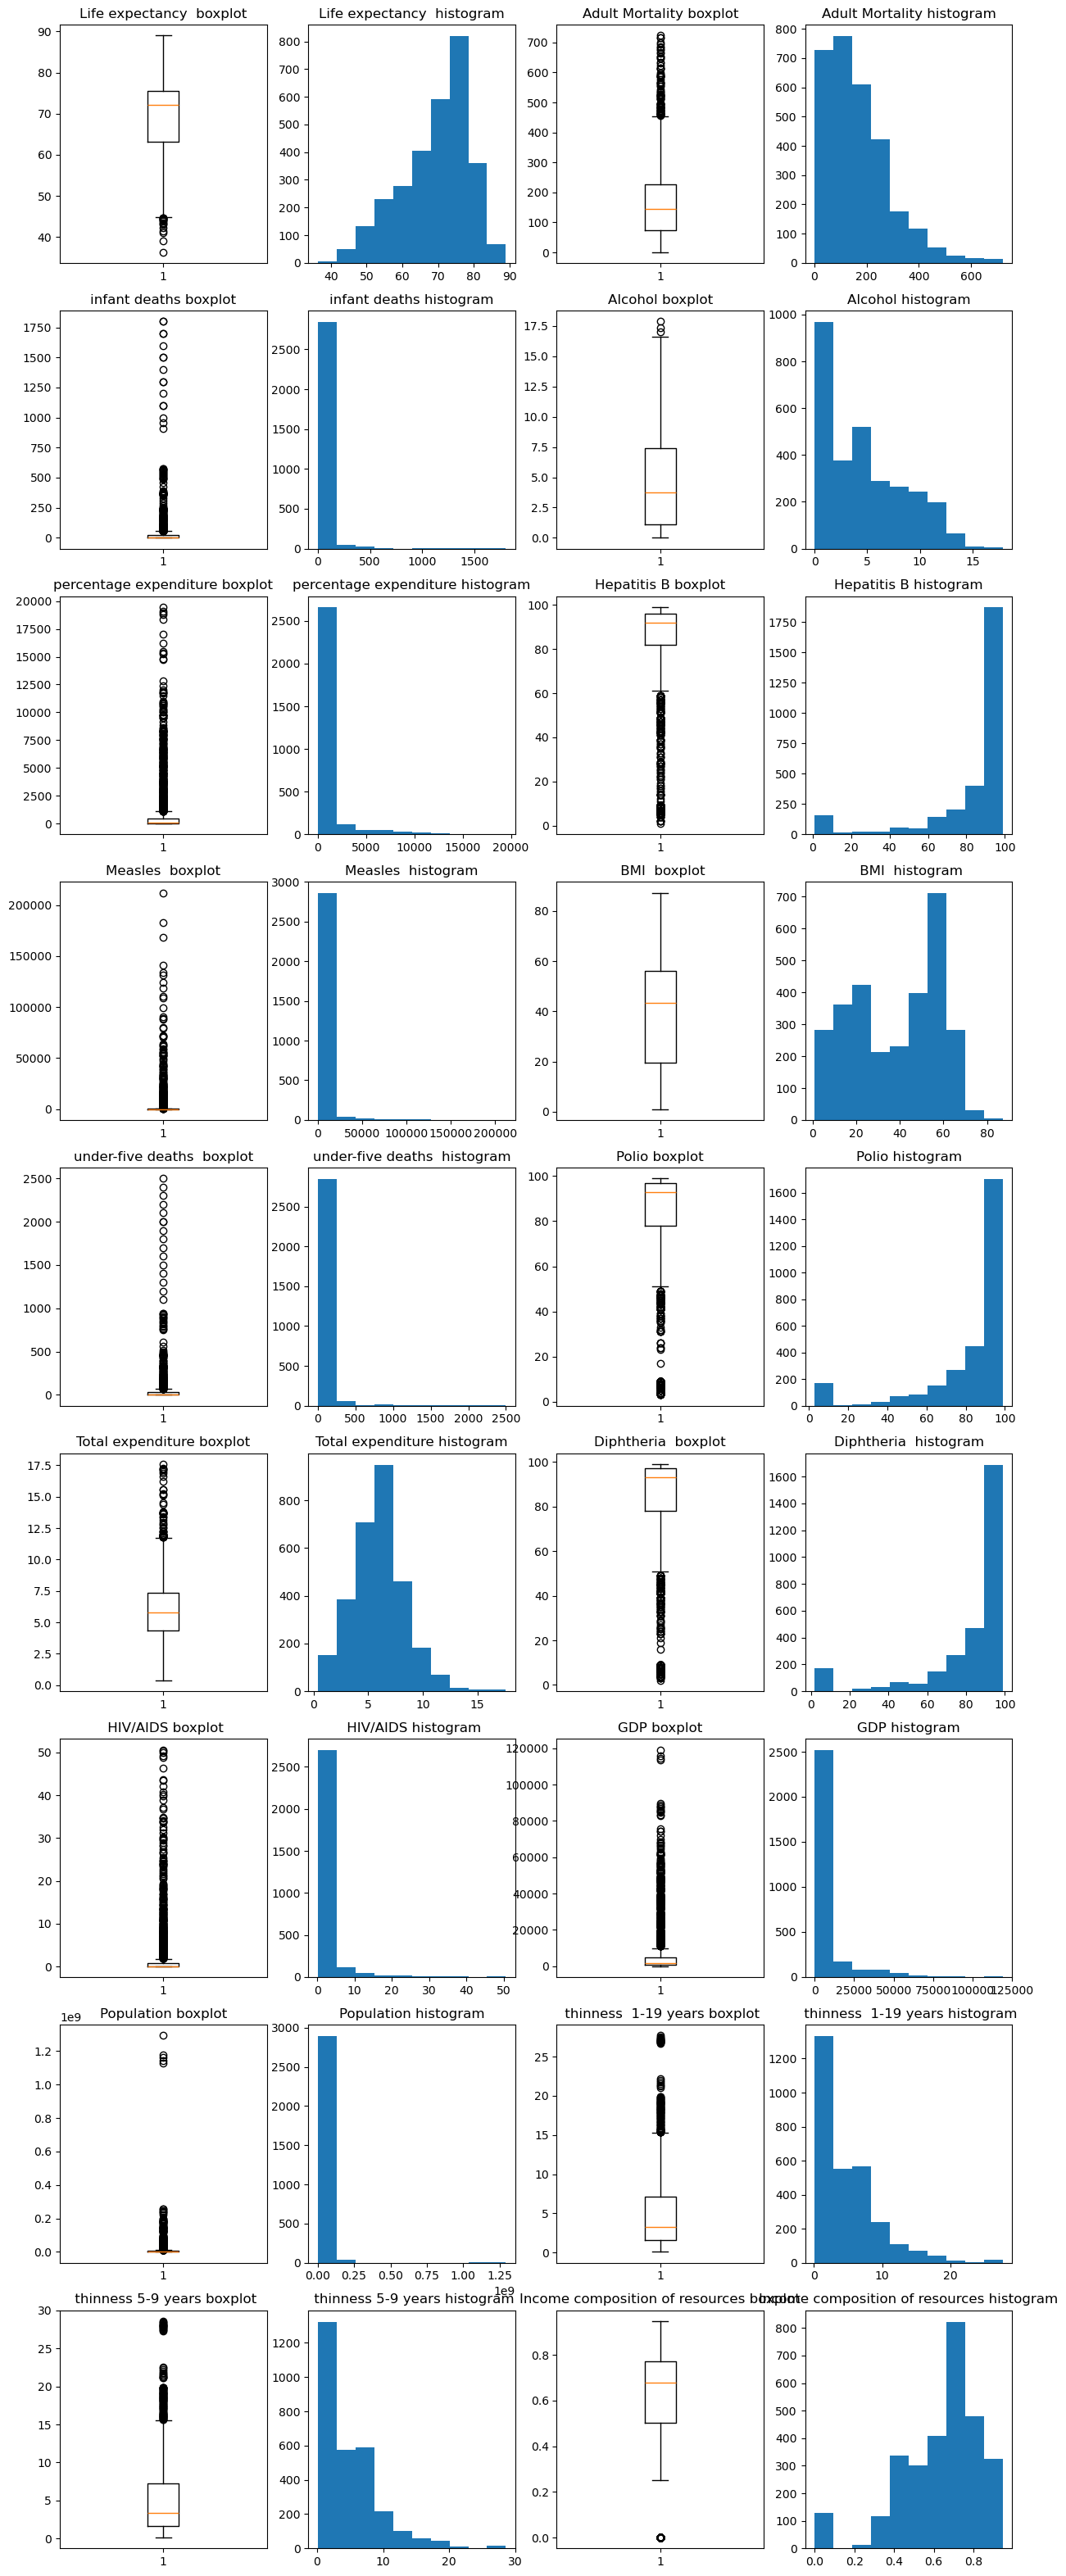

In [155]:
cont_vars = list(df.columns)[3:]
def outliers_visual(data):
    plt.figure(figsize=(15, 40))
    i = 0
    for col in cont_vars:
        i += 1
        plt.subplot(9, 4, i)
        plt.boxplot(data[col])
        plt.title('{} boxplot'.format(col))
        i += 1
        plt.subplot(9, 4, i)
        plt.hist(data[col])
        plt.title('{} histogram'.format(col))
    plt.show()
outliers_visual(df)

Visually, it is plain to see that there are a number of outliers for all of these variables - including the target variable, life expectancy. The same will be done statistically using Tukey's method below - outliers being considered anything outside of 1.5 times the IQR.

In [157]:
def outlier_count(col, data=df):
    print(15*'-' + col + 15*'-')
    q75, q25 = np.percentile(data[col], [75, 25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    outlier_count = len(np.where((data[col] > max_val) | (data[col] < min_val))[0])
    outlier_percent = round(outlier_count/len(data[col])*100, 2)
    print('Number of outliers: {}'.format(outlier_count))
    print('Percent of data that is outlier: {}%'.format(outlier_percent))

In [159]:
for col in cont_vars:
    outlier_count(col)

---------------Life expectancy ---------------
Number of outliers: 17
Percent of data that is outlier: 0.58%
---------------Adult Mortality---------------
Number of outliers: 86
Percent of data that is outlier: 2.93%
---------------infant deaths---------------
Number of outliers: 315
Percent of data that is outlier: 10.72%
---------------Alcohol---------------
Number of outliers: 3
Percent of data that is outlier: 0.1%
---------------percentage expenditure---------------
Number of outliers: 389
Percent of data that is outlier: 13.24%
---------------Hepatitis B---------------
Number of outliers: 322
Percent of data that is outlier: 10.96%
---------------Measles ---------------
Number of outliers: 542
Percent of data that is outlier: 18.45%
--------------- BMI ---------------
Number of outliers: 0
Percent of data that is outlier: 0.0%
---------------under-five deaths ---------------
Number of outliers: 394
Percent of data that is outlier: 13.41%
---------------Polio---------------
Number

It appears there are a decent amount of outliers in this dataset. Now that they have been detected, what should be done with them?

## Dealing with Outliers

There are a number of ways to deal with outliers in a dataset, the usual options are as follows:
1. Drop Outliers (best avoided in order to keep as much information as possible)
2. Limit values to upper and/or lower bounds (Winsorize the data)
3. Transform the data (log/inverse/square root/etc.)
    - advantage: can 'normalize' the data and eliminate outliers
    - disadvantage: cannot be done to variables containing values of 0 or below

Since each variable has a unique amount of outliers and also has outliers on different sides of the data, the best route to take is probably winsorizing (limiting) the values for each variable on its own until no outliers remain. The function below allows me to do exactly that by going variable by variable with the ability to use a lower limit and/or upper limit for winsorization. By default the function will show two boxplots side by side for the variable (one boxplot of the original data, and one with the winsorized change). Once a satisfactory limit is found (by visual analysis), the winsorized data will be saved in the wins_dict dictionary so the data can easily be accessed later.

In [161]:
def test_wins(col, lower_limit=0, upper_limit=0, show_plot=True):
    wins_data = winsorize(df[col], limits=(lower_limit, upper_limit))
    wins_dict[col] = wins_data
    if show_plot == True:
        plt.figure(figsize=(15,5))
        plt.subplot(121)
        plt.boxplot(df[col])
        plt.title('original {}'.format(col))
        plt.subplot(122)
        plt.boxplot(wins_data)
        plt.title('wins=({},{}) {}'.format(lower_limit, upper_limit, col))
        plt.show()

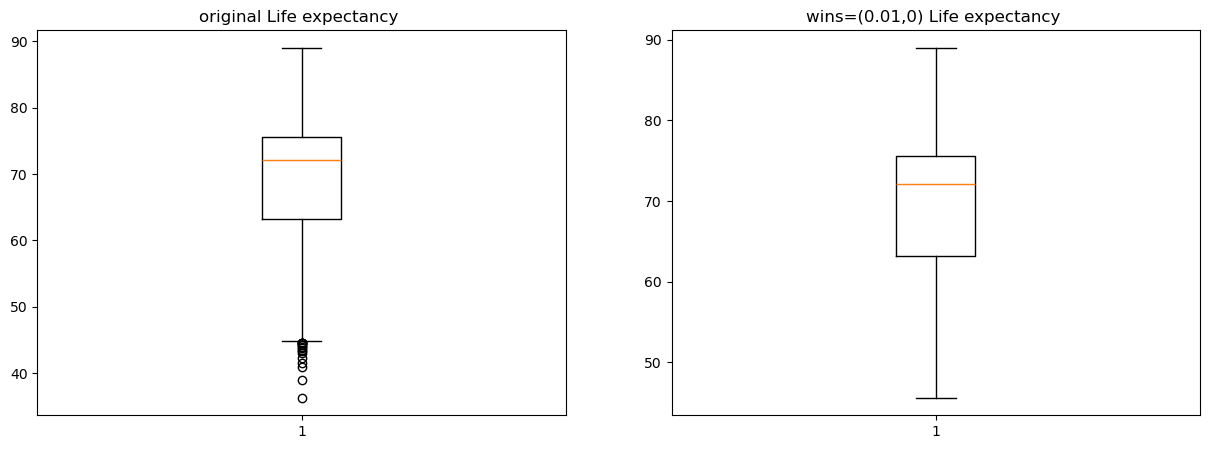

In [163]:
wins_dict = {}
test_wins(cont_vars[0], lower_limit=.01, show_plot=True)
test_wins(cont_vars[1], upper_limit=.04, show_plot=False)
test_wins(cont_vars[2], upper_limit=.05, show_plot=False)
test_wins(cont_vars[3], upper_limit=.0025, show_plot=False)
test_wins(cont_vars[4], upper_limit=.135, show_plot=False)
test_wins(cont_vars[5], lower_limit=.1, show_plot=False)
test_wins(cont_vars[6], upper_limit=.19, show_plot=False)
test_wins(cont_vars[7], upper_limit=.05, show_plot=False)
test_wins(cont_vars[8], lower_limit=.1, show_plot=False)
test_wins(cont_vars[9], upper_limit=.02, show_plot=False)
test_wins(cont_vars[10], lower_limit=.105, show_plot=False)
test_wins(cont_vars[11], upper_limit=.185, show_plot=False)
test_wins(cont_vars[12], upper_limit=.105, show_plot=False)
test_wins(cont_vars[13], upper_limit=.07, show_plot=False)
test_wins(cont_vars[14], upper_limit=.035, show_plot=False)
test_wins(cont_vars[15], upper_limit=.035, show_plot=False)
test_wins(cont_vars[16], lower_limit=.05, show_plot=False)
test_wins(cont_vars[17], lower_limit=.025, upper_limit=.005, show_plot=False)

The plot above is an example of how the winsorization is visually inspected

All the variables have now been winsorized as little as possible in order to keep as much data in tact as possible while still being able to eliminate the outliers. Finally, small boxplots will be shown for each variable's winsorized data to show that the outliers have indeed been dealt with.

ValueError: num must be an integer with 1 <= num <= 18, not 19

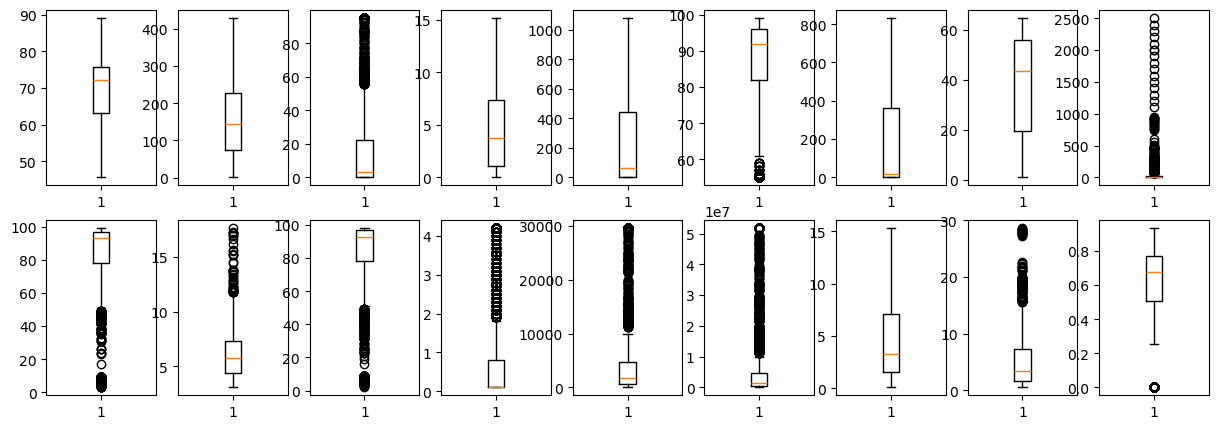

In [165]:
plt.figure(figsize=(15,5))
for i, col in enumerate(cont_vars, 1):
    plt.subplot(2, 9, i)
    plt.boxplot(wins_dict[col])
plt.tight_layout()
plt.show()

Now that the outliers have been dealt with, the data cleaning section is complete

## Frequency Distribution of Life Expectancy (Target variable)

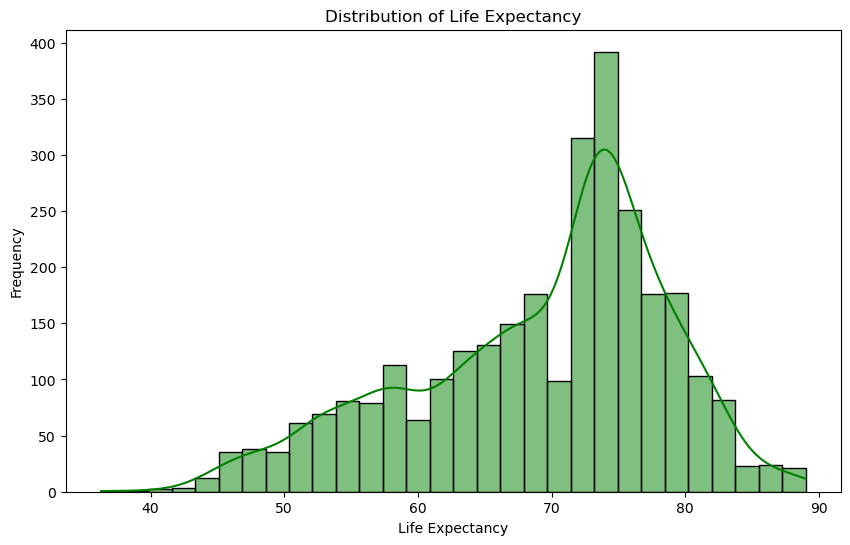

In [167]:
plt.figure(figsize=(10, 6))
sns.histplot(df["Life expectancy "], bins=30, kde=True, color='green')
plt.title("Distribution of Life Expectancy")
plt.xlabel("Life Expectancy")
plt.ylabel("Frequency")
plt.show()

## Visual Correlation between Life Expectancy & other features

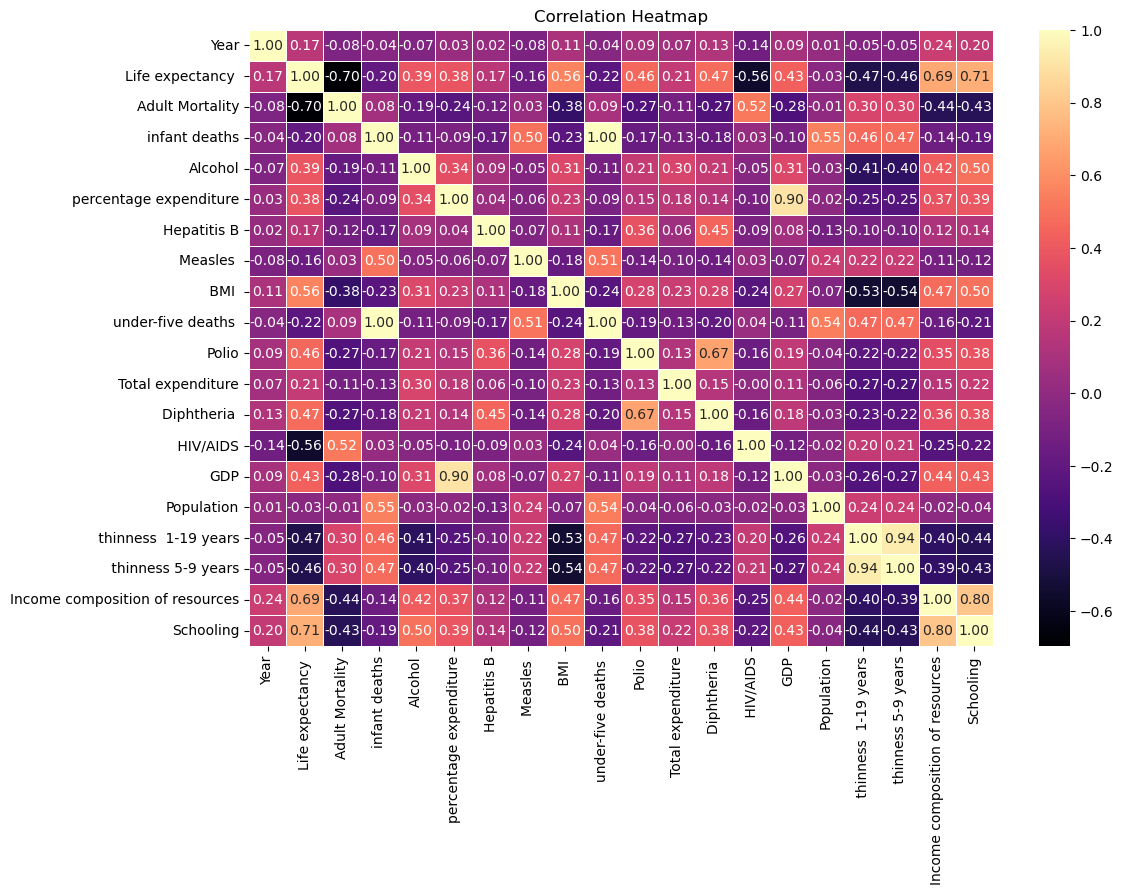

In [169]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(numeric_only=True), cmap='magma', annot=True, fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

# Key Insights from the above Correlation Heatmap

### (I) Life Expectancy has Strong Positive Correlation with:
#### 1) Schooling (0.71) - More education with longer life expectancy.

#### 2) Income composition of resources (0.69) - Higher income and resource access increase life expectancy.

#### 3) Diphtheria (0.67) and GDP (0.43) - Better vaccination coverage and stronger economies promote longer life spans.

### (II) Life Expectancy has Strong Negative Correlation with:

#### 1) Adult Mortality (-0.70) and Infant deaths (-0.44) - Higher mortality rates reduce life expectancy.

#### 2) Under-five deaths (-0.44) - More child deaths = lower life expectancy.

### (III) Adult Mortality, Infant deaths, and Under-five deaths are highly positively correlated (~0.9).
#### This Suggests that these indicators move together — if one is high, others tend to be high too.

### (IV) Education and Income: 

#### 1) Schooling - Income composition of resources (0.64) : Countries with better education levels tend to have higher income equality and resource access.

#### 2) Schooling - GDP (0.43) : Education correlates moderately with national income, reflecting economic development.

## Pairplot for top correlated features

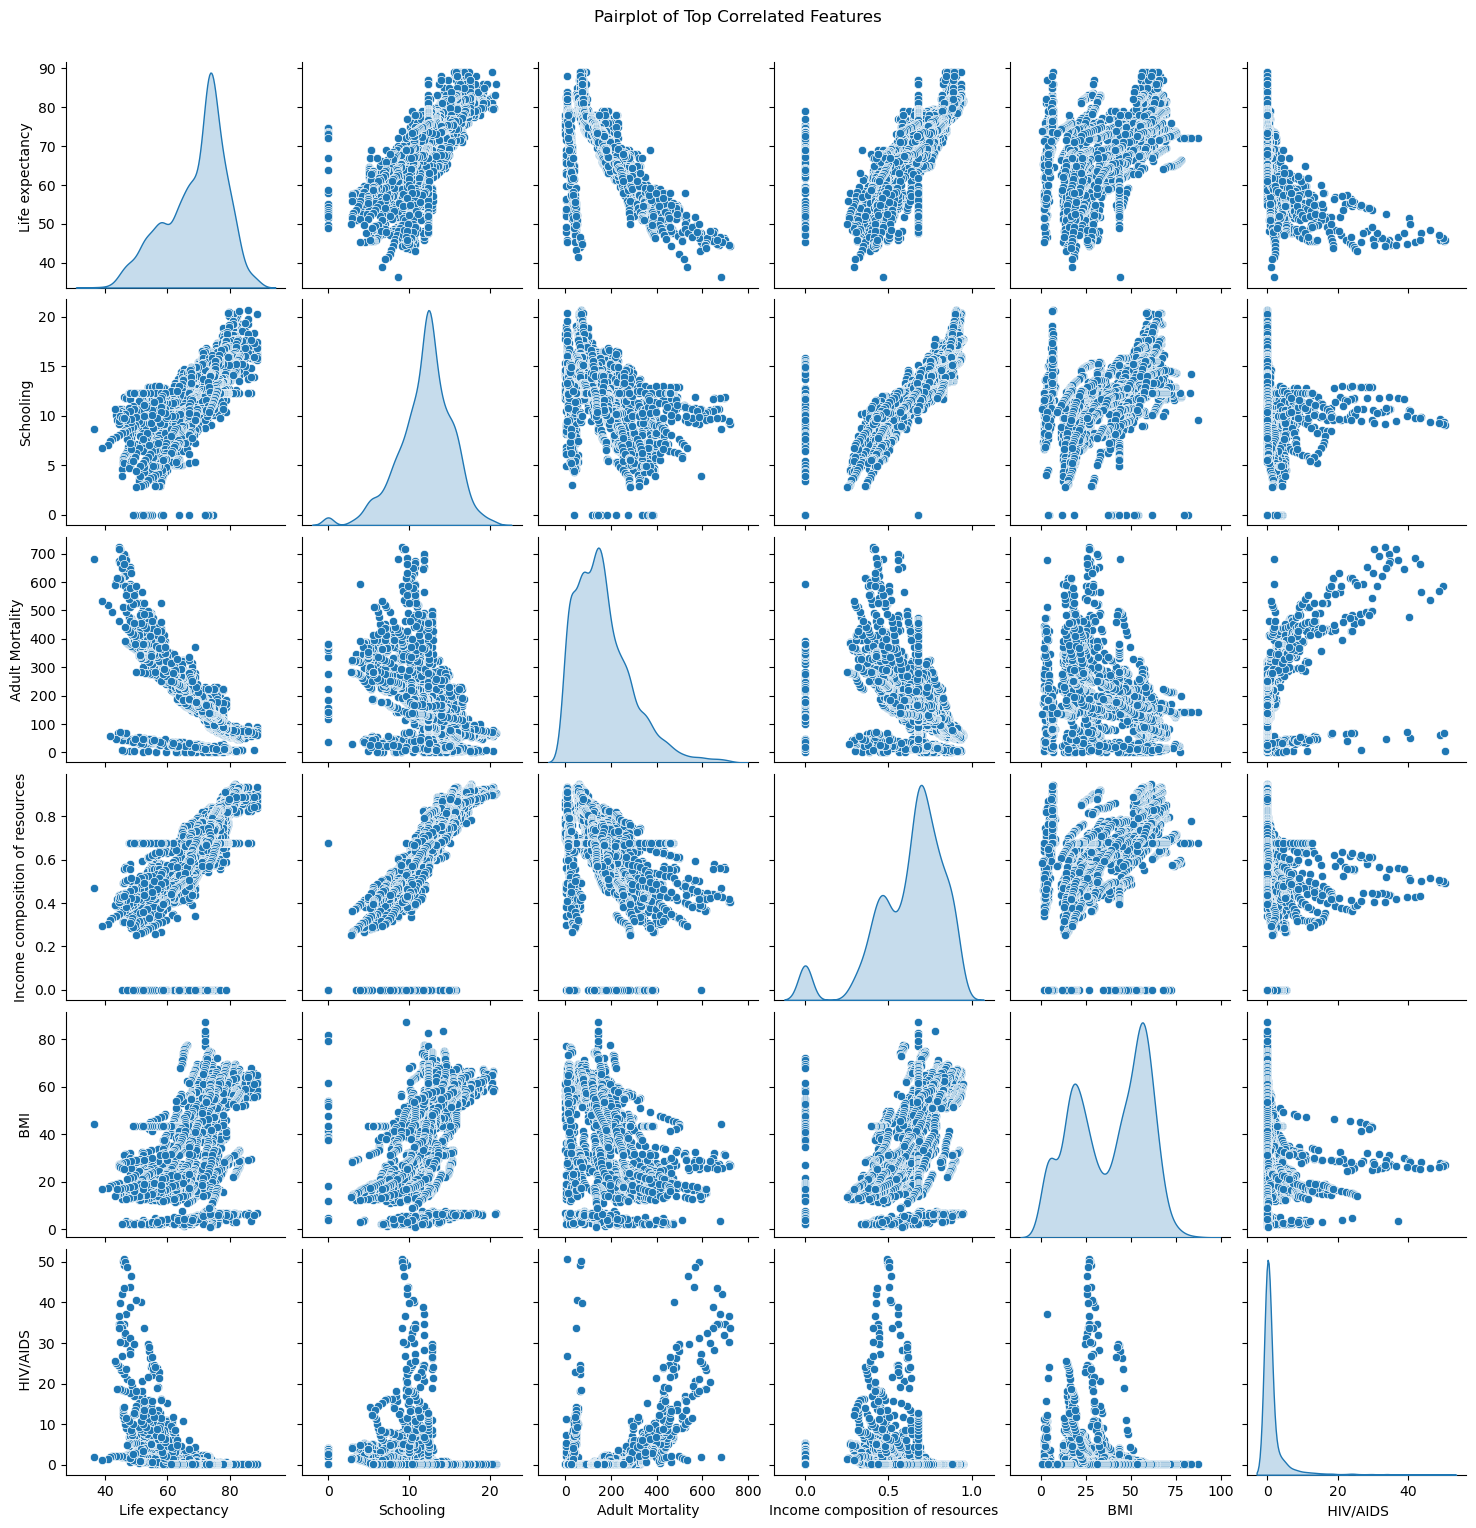

In [171]:
top_corr = df.corr(numeric_only=True)["Life expectancy "].abs().sort_values(ascending=False).head(6).index
sns.pairplot(df[top_corr], diag_kind='kde')
plt.suptitle("Pairplot of Top Correlated Features", y=1.02)
plt.show()

# Top contributing features

<Figure size 1200x800 with 0 Axes>

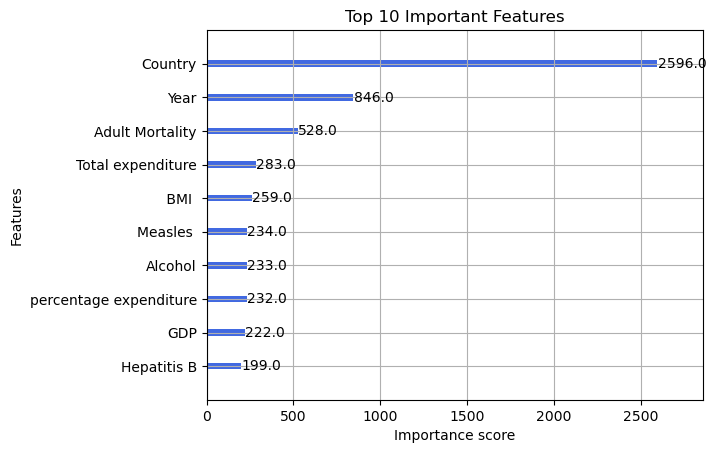

In [218]:
plt.figure(figsize=(12, 8))
xgb.plot_importance(gs.best_estimator_, max_num_features=10, importance_type='weight', color='RoyalBlue')
plt.title("Top 10 Important Features")
plt.show()

----------------------------------------------------------------

# Model Implementation

## Data Preparation

### Encoding the 'Status' column

In [177]:
label_encoder = LabelEncoder()
df['Status'] = label_encoder.fit_transform(df['Status'])

### Separate features and target

In [189]:
X = df.drop(columns=['Country','Life expectancy ', 'Year']).values
y = df['Life expectancy '].values

### Split Data into Train & Test Sets

In [191]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Define models

In [193]:
models = {  
    "LinearRegression": (LinearRegression(), StandardScaler()),
    "Ridge": (Ridge(alpha=1.0), StandardScaler()),
    "Lasso": (Lasso(alpha=0.1), StandardScaler()),
    "SVR": (SVR(kernel='rbf'), StandardScaler()),
    "DecisionTree": (DecisionTreeRegressor(), MinMaxScaler()),
    "RandomForest": (RandomForestRegressor(), MinMaxScaler()),
    "GradientBoosting": (GradientBoostingRegressor(), MinMaxScaler()),
    "KNN": (KNeighborsRegressor(n_neighbors=5), StandardScaler()),
    "XGBoost": (XGBRegressor(), MinMaxScaler())
}

### Hyperparameter grid for each model

In [195]:
param_grid = {
    "LinearRegression": {},
    "Ridge": {'model__alpha': [0.01, 0.1, 1, 10, 100]},  # Regularization strength
    "Lasso": {'model__alpha': [0.001, 0.01, 0.1, 1, 10]},  # Regularization strength
    "SVR": {
        'model__C': [0.1, 1, 10, 100],  # Regularization parameter
        'model__epsilon': [0.01, 0.1, 0.2]  # Defines tolerance margin for regression
    },
    "DecisionTree": {
        'model__max_depth': [None, 5, 10, 20],  # Limits overfitting
        'model__min_samples_split': [2, 5, 10]  # Minimum samples required to split a node
    },
    "RandomForest": {
        'model__n_estimators': [50, 100, 200],  # Number of trees
        'model__max_depth': [None, 5, 10],  # Limits overfitting
        'model__min_samples_split': [2, 5, 10]  # Controls when a node should split
    },
    "GradientBoosting": {
        'model__n_estimators': [50, 100, 200],  # Number of boosting stages
        'model__learning_rate': [0.01, 0.1, 0.2],  # Shrinks contribution of each tree
        'model__max_depth': [3, 5, 10]  # Depth of trees
    },
    "KNN": {'model__n_neighbors': [3, 5, 7, 10], # Number of neighbors
            'model__p': [1, 2]  # Distance metric: 1 for Manhattan, 2 for Euclidean
            },
    "XGBoost": {
        'model__n_estimators': [50, 100, 200],  # Number of boosting rounds
        'model__learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage
        'model__max_depth': [3, 5, 10]  # Depth of trees
    }
}


In [197]:
# Store results
results = []

# Training and evaluating models
for name, (model, scaler) in models.items():
    print(f"Training {name}...")

    # Create a pipeline
    pipeline = Pipeline([
        ('scaler', scaler),
        ('model', model)
    ])

    # Grid search with cross-validation
    grid_search = GridSearchCV(pipeline, param_grid[name], cv=5, scoring='r2', n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model evaluation
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Compute metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Append results
    results.append([name, grid_search.best_params_, mae, mse, rmse, r2])

    # Save best model if it's the highest R²
    if r2 == max([r[5] for r in results]):
        best_model_overall = best_model

Training LinearRegression...
Training Ridge...
Training Lasso...
Training SVR...
Training DecisionTree...
Training RandomForest...
Training GradientBoosting...
Training KNN...
Training XGBoost...


In [199]:
results_df = pd.DataFrame(results, columns=["Model", "Best Params", "MAE", "MSE", "RMSE", "R²"])
results_df

,Model,Best Params,MAE,MSE,RMSE,R²
0,LinearRegression,{},2.856,15.293,3.911,0.824
1,Ridge,{'model__alpha': 0.01},2.856,15.293,3.911,0.824
2,Lasso,{'model__alpha': 0.001},2.856,15.298,3.911,0.823
3,SVR,"{'model__C': 100, 'model__epsilon': 0.2}",1.430,4.935,2.221,0.943
4,DecisionTree,"{'model__max_depth': 10, 'model__min_samples_s...",1.683,6.824,2.612,0.921
5,RandomForest,"{'model__max_depth': None, 'model__min_samples...",1.112,2.899,1.703,0.967
6,GradientBoosting,"{'model__learning_rate': 0.2, 'model__max_dept...",1.144,2.885,1.698,0.967
7,KNN,"{'model__n_neighbors': 3, 'model__p': 1}",1.435,5.143,2.268,0.941
8,XGBoost,"{'model__learning_rate': 0.2, 'model__max_dept...",1.183,3.008,1.734,0.965


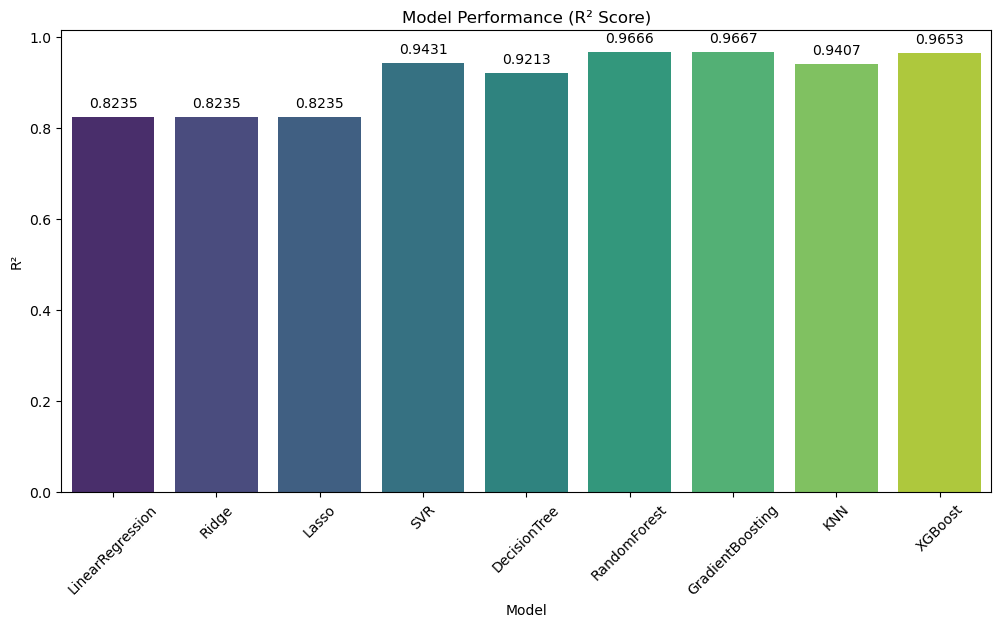

In [201]:
plt.figure(figsize=(12, 6))
ax = sns.barplot(x="Model", y="R²", data=results_df, palette="viridis")
plt.title("Model Performance (R² Score)")
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(
        f'{p.get_height():.4f}',
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='center',
        xytext=(0, 10),  # Adjust vertical offset of text
        textcoords='offset points'
    )

plt.show()

### Save the best model

In [203]:
import joblib
joblib.dump(best_model_overall, "best_model.pkl")

['best_model.pkl']